In [2]:
### Goals predict quality
### if i join this data, can i clu'ster the red and white wine unsipervised


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
red_wine = 'C://Users//vinic//Documents//Python//Machine Learning//Projetos UCI ML//Wine Quality//wine+quality//winequality-red.csv'
white_wine = 'C://Users//vinic//Documents//Python//Machine Learning//Projetos UCI ML//Wine Quality//wine+quality//winequality-white.csv'
data_red_wine = pd.read_csv(red_wine,header=0,sep=';')
data_white_wine = pd.read_csv(white_wine,header=0,sep=';')


In [5]:
data_white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(len(data_red_wine))
print(len(data_white_wine))

1599
4898


In [7]:
data_white_wine.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [8]:
data_red_wine.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [9]:
fig = px.imshow(data_red_wine.corr())
fig.show()

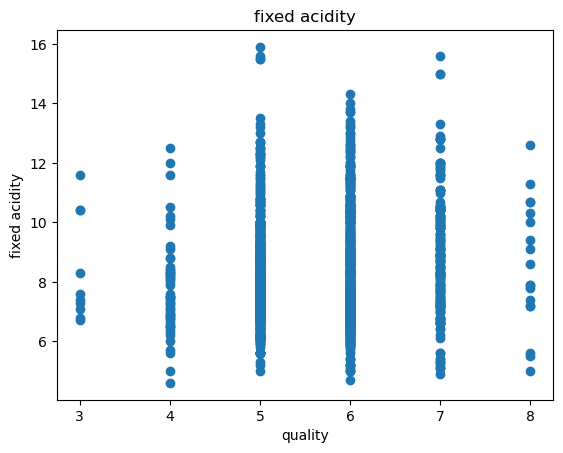

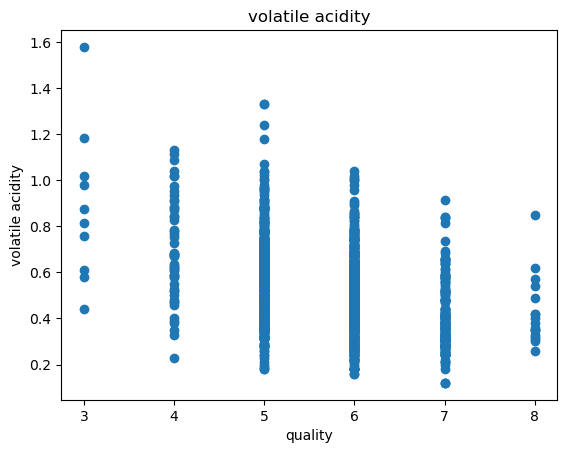

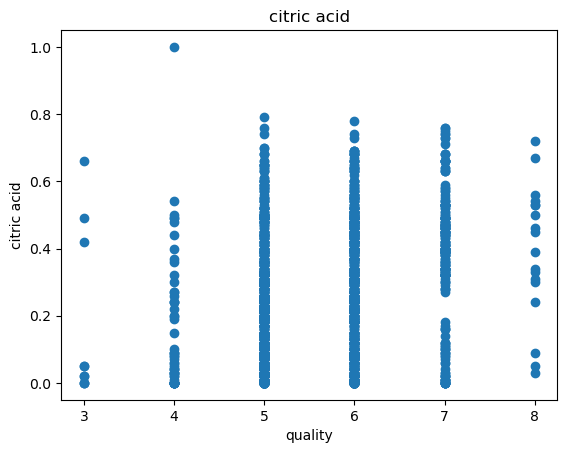

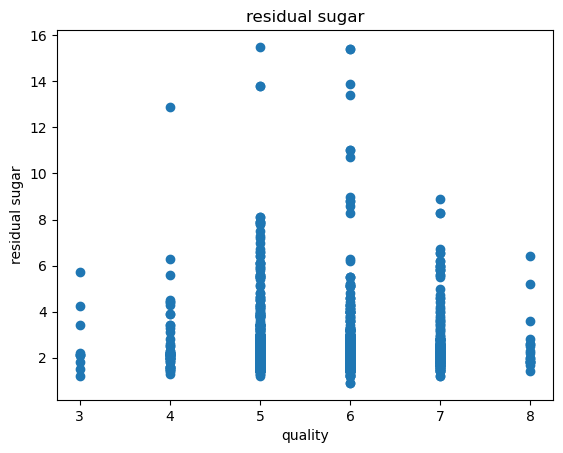

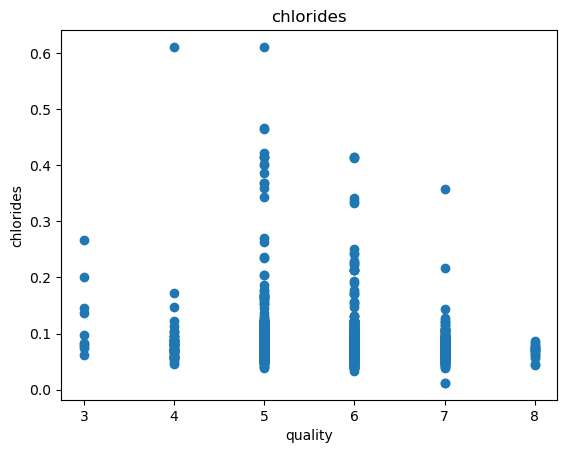

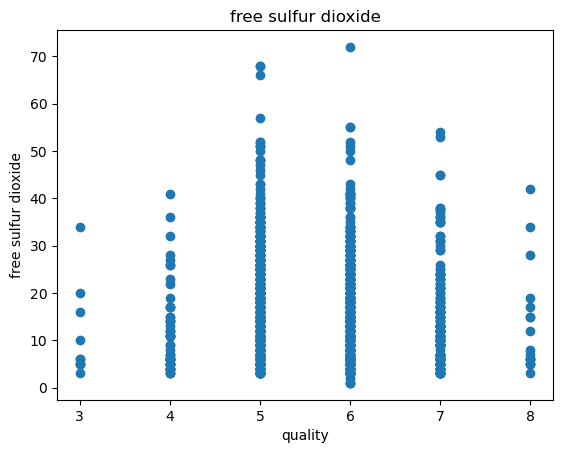

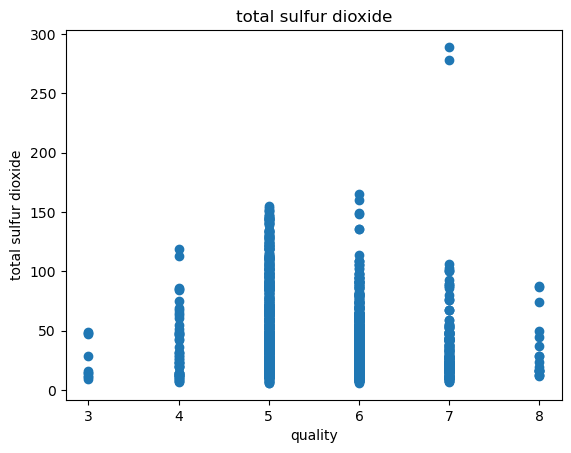

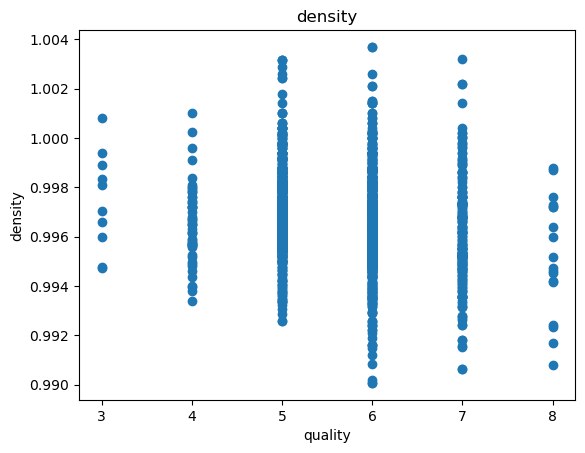

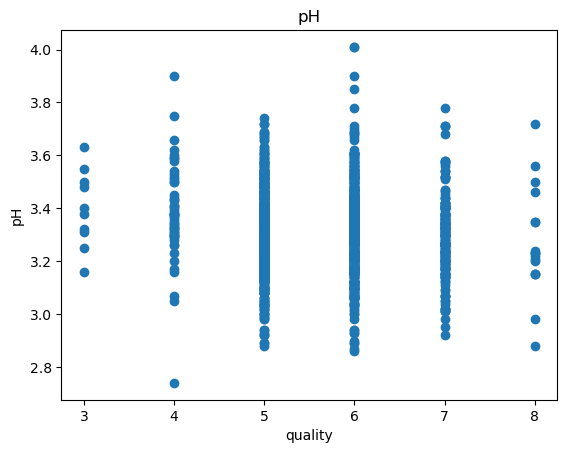

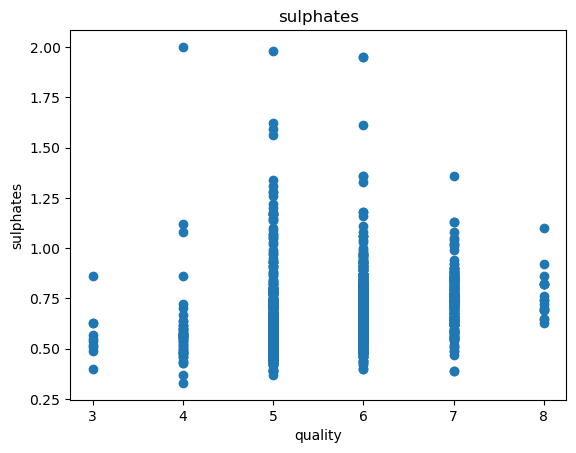

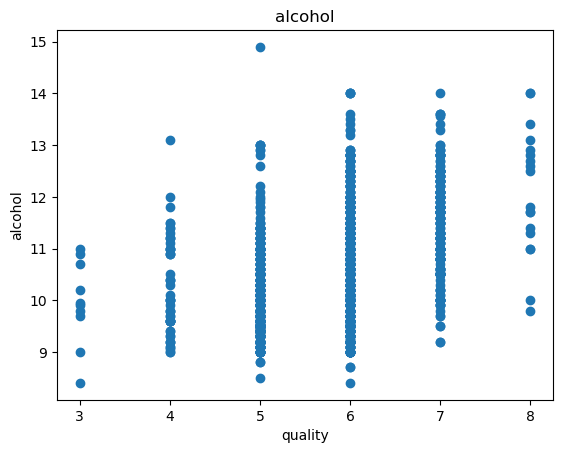

In [10]:
for label in data_red_wine.columns[:-1]:
    plt.scatter(data_red_wine['quality'],data_red_wine[label])
    plt.title(label)
    plt.ylabel(label)
    plt.xlabel('quality')
    plt.show()

In [11]:
(data_red_wine['quality'].value_counts()/len(data_red_wine))*100

quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: count, dtype: float64

In [12]:
(data_white_wine['quality'].value_counts()/len(data_white_wine))*100

quality
6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: count, dtype: float64

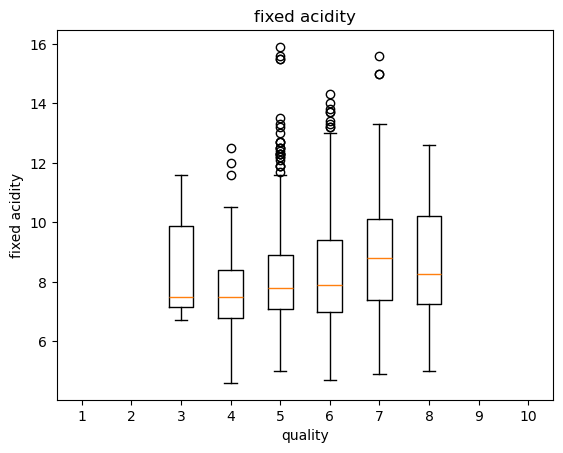

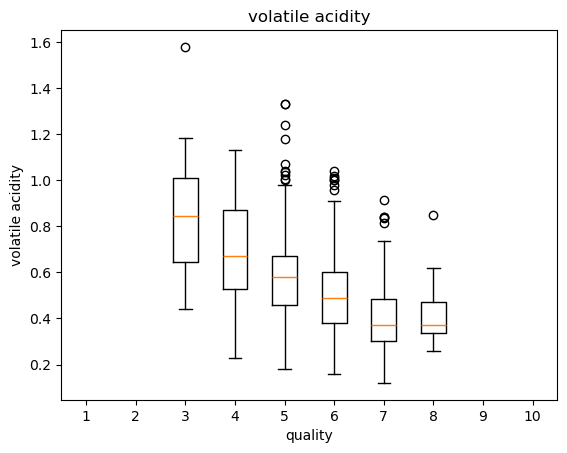

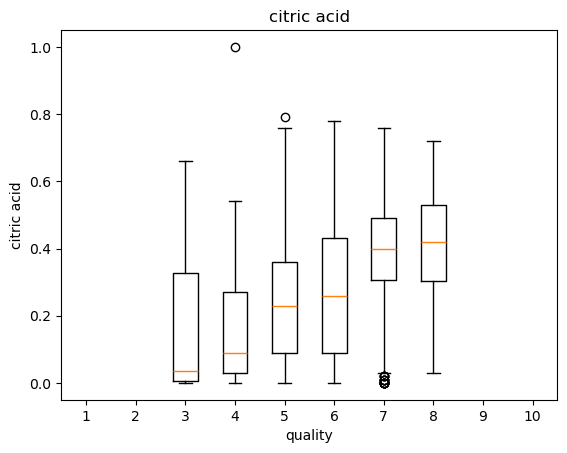

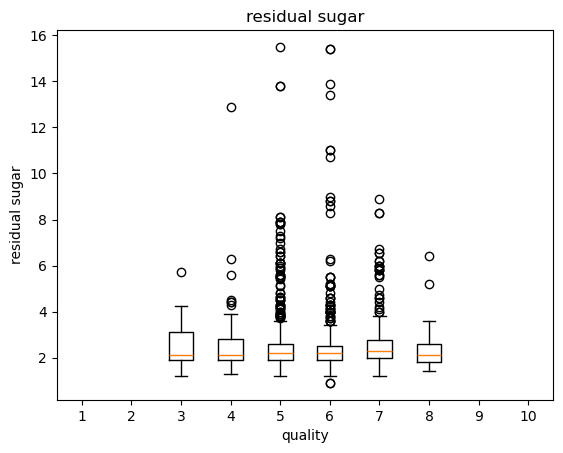

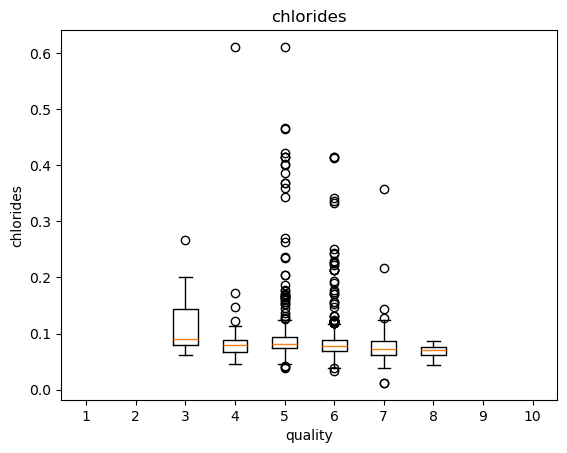

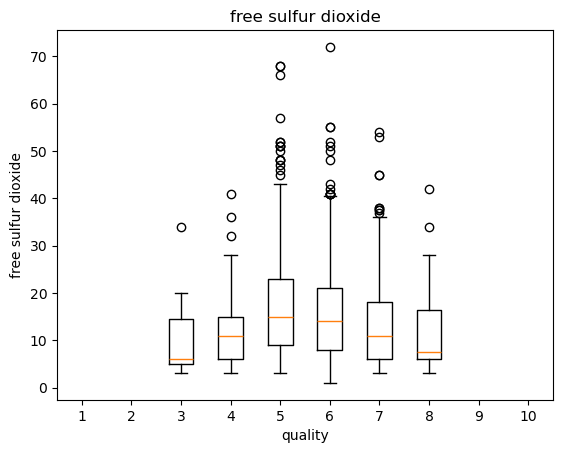

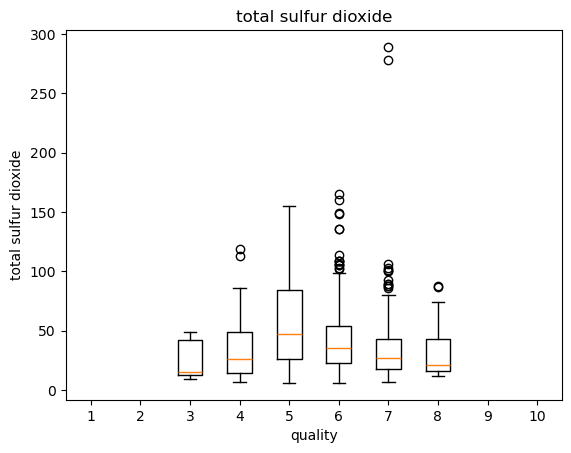

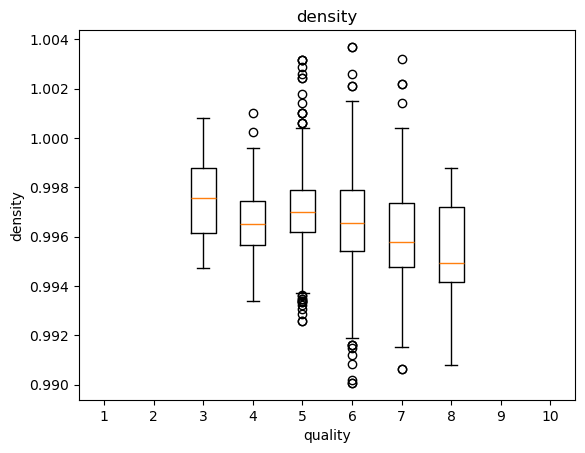

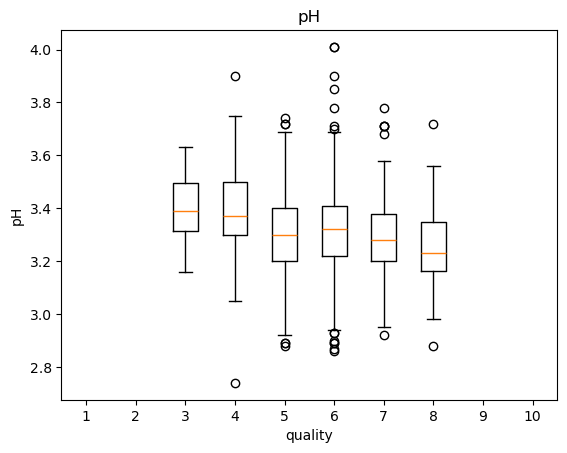

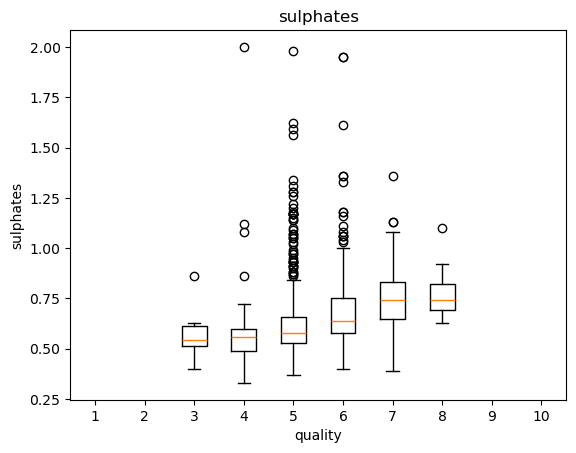

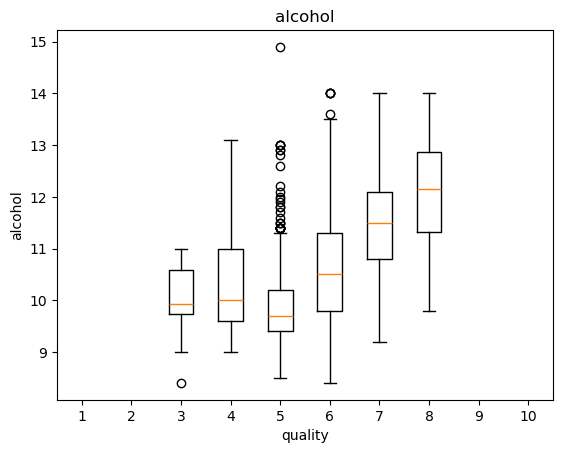

In [13]:
for label in data_red_wine.columns[:-1]:
    plt.boxplot([data_red_wine[data_red_wine['quality']==i][label] for i in range(1,11)])
    plt.title(label)
    plt.ylabel(label)
    plt.xlabel('quality')
    plt.show()

In [14]:
data_white_wine.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [15]:
fig = px.imshow(data_white_wine.corr())
fig.show()

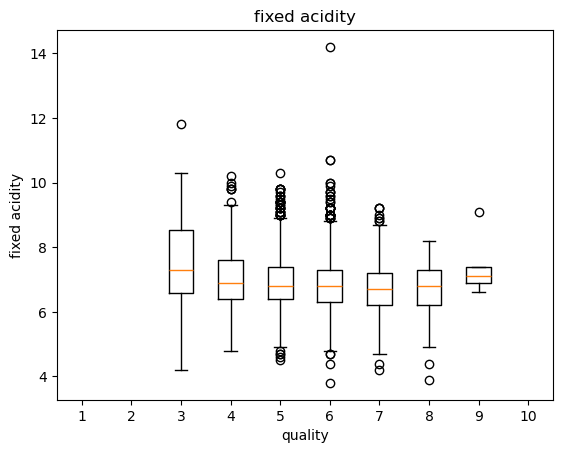

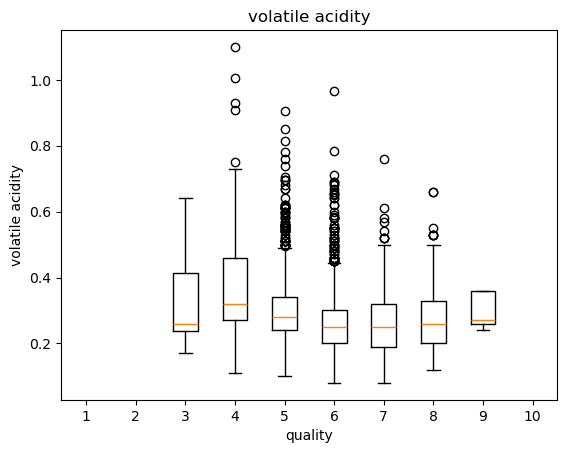

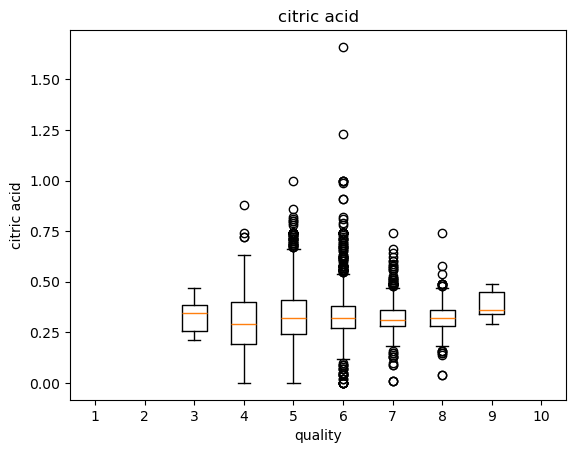

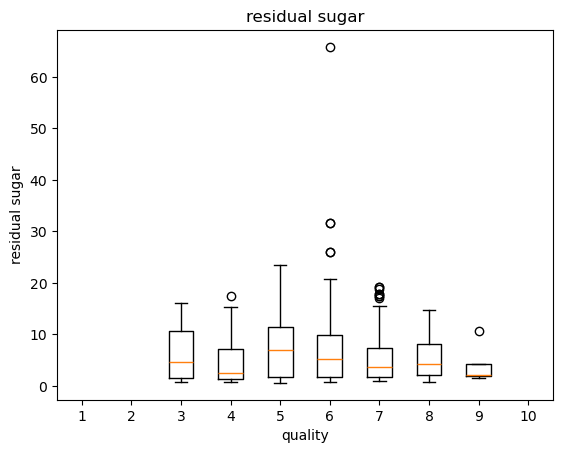

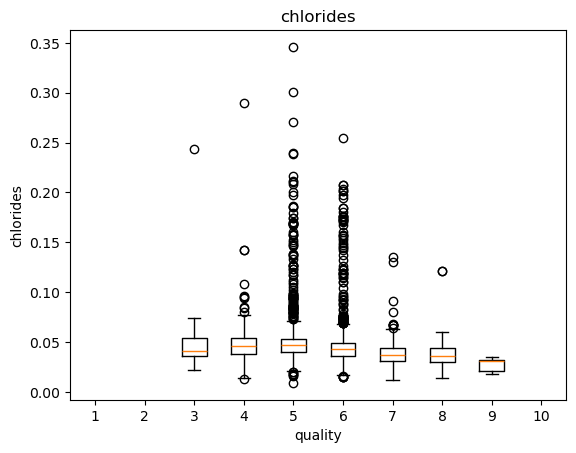

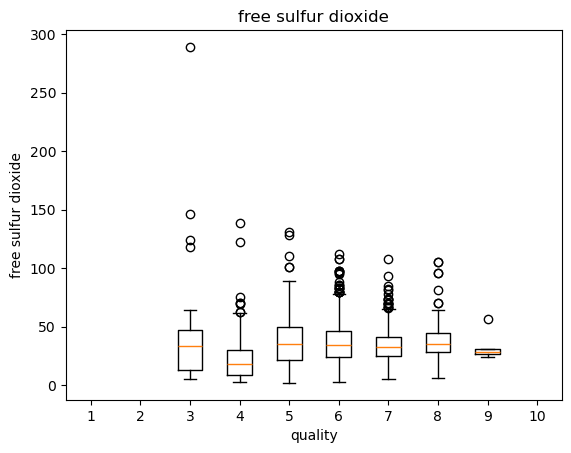

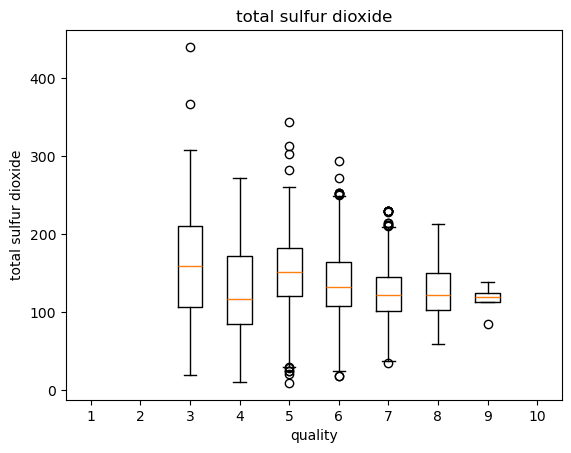

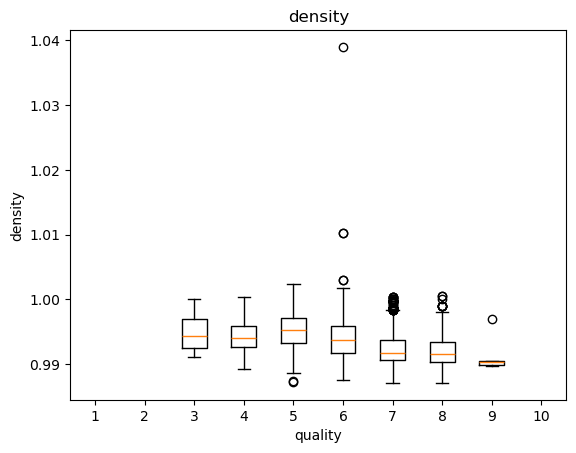

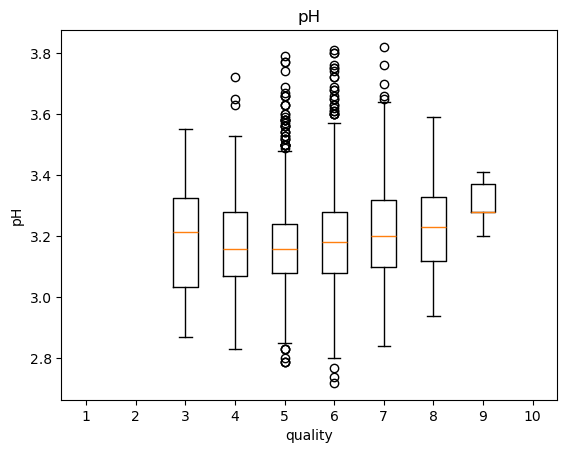

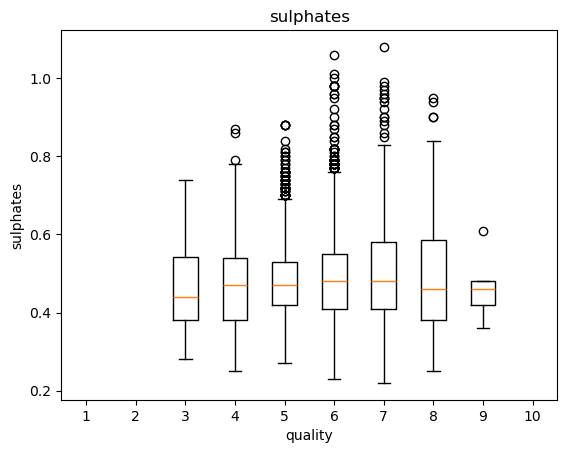

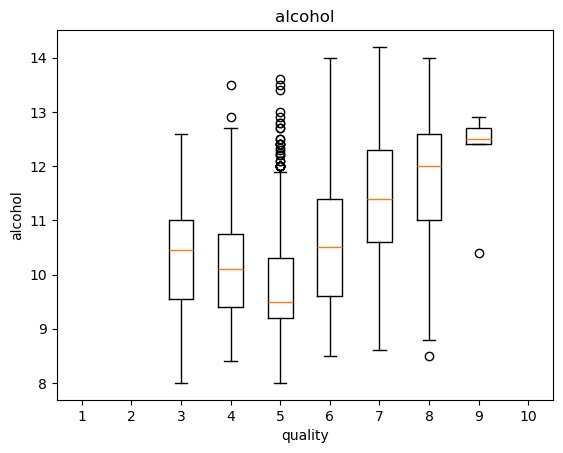

In [16]:
for label in data_white_wine.columns[:-1]:
    plt.boxplot([data_white_wine[data_white_wine['quality']==i][label] for i in range(1,11)])
    plt.title(label)
    plt.ylabel(label)
    plt.xlabel('quality')
    plt.show()

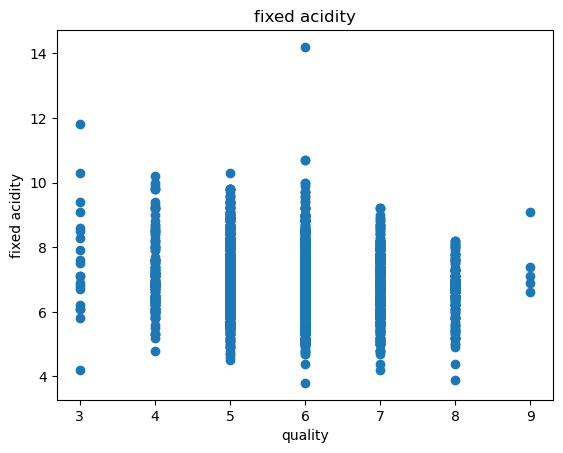

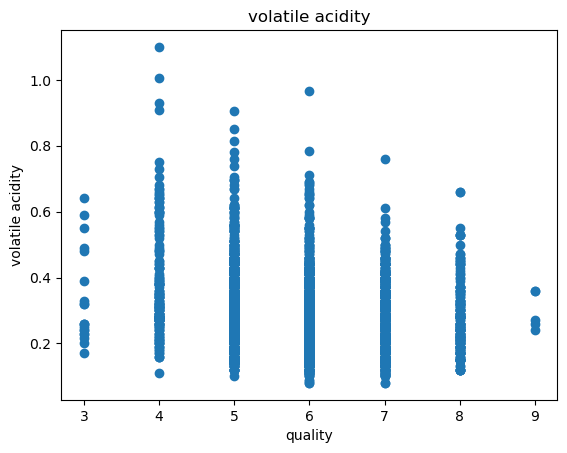

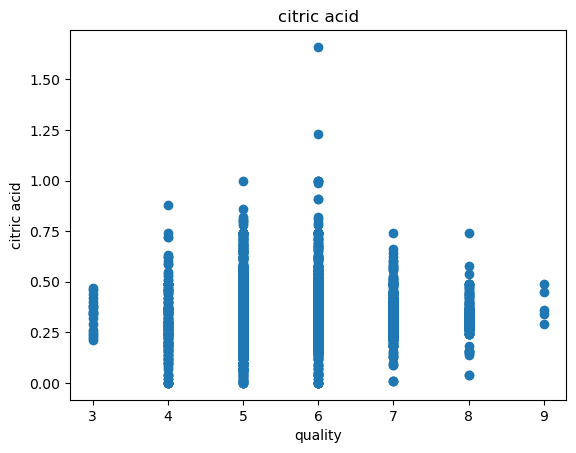

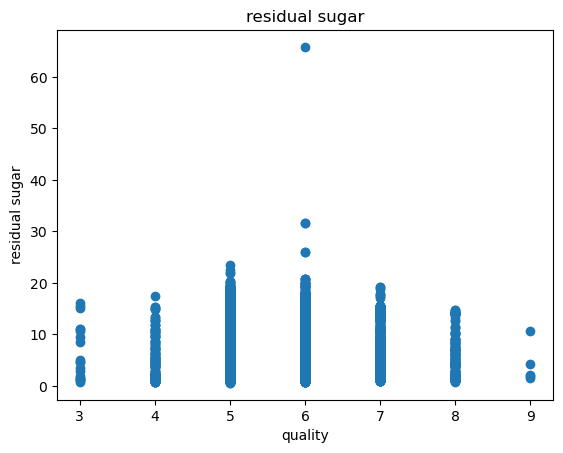

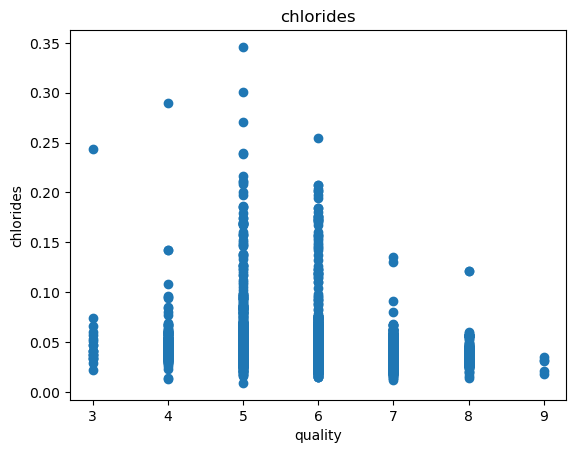

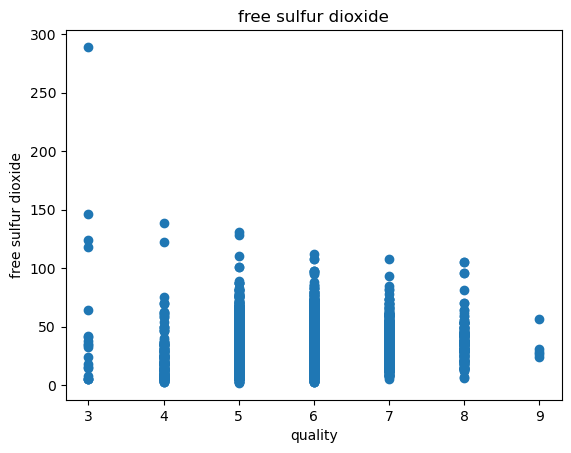

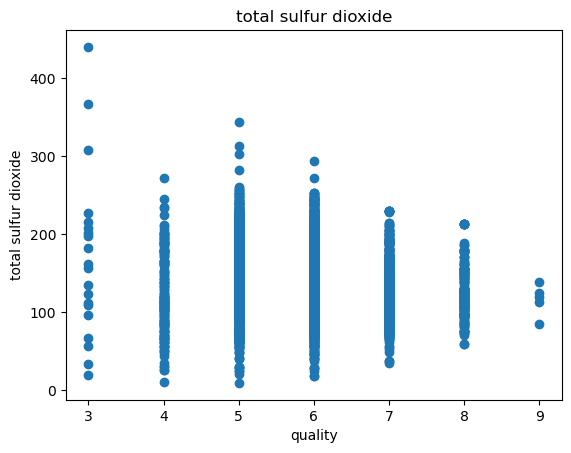

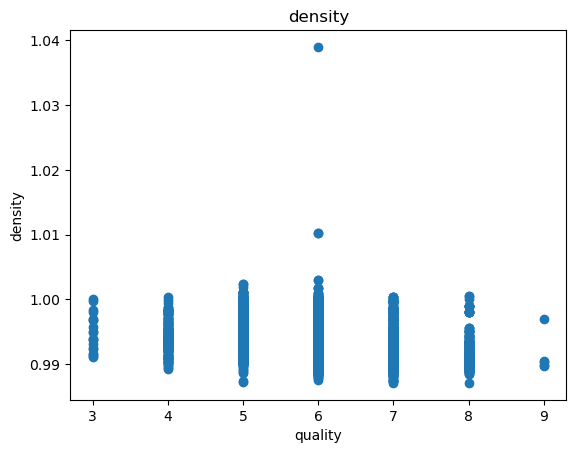

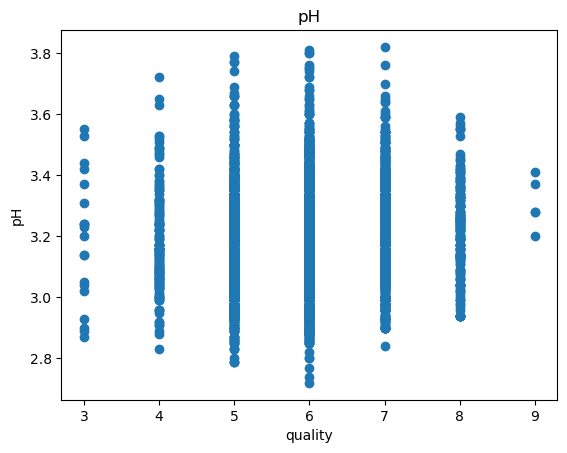

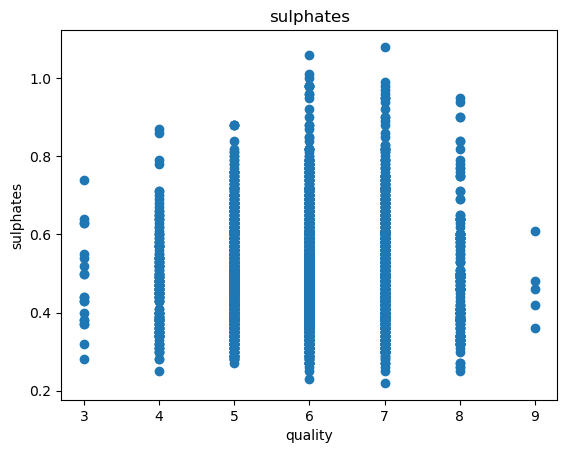

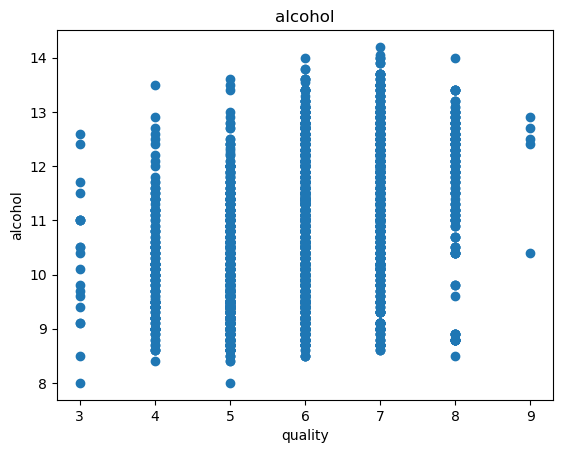

In [17]:
for label in data_white_wine.columns[:-1]:
    plt.scatter(data_white_wine['quality'],data_white_wine[label])
    plt.title(label)
    plt.ylabel(label)
    plt.xlabel('quality')
    plt.show()

we only have int num in the quality, so we can use a lot of models

In [18]:
data_red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [19]:
data_white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

## Train, Validation and test Data Sets

In [20]:
# data.sample shuffles the data

red_wine_train, red_wine_valid, red_wine_test = np.split(data_red_wine.sample(frac=1), [int(0.6*len(data_red_wine)), int(0.8*len(data_red_wine))])
white_wine_train, white_wine_valid, white_wine_test = np.split(data_white_wine.sample(frac=1), [int(0.6*len(data_white_wine)), int(0.8*len(data_white_wine))])

    


c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [21]:
def scale_dataset(dataframe,oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    #Scale the number, so we dont have  huge discrepancy between columns, it affects the model
    X = scaler.fit_transform(X)
    
    #the difference between the len of the values must not be huge, so we have to scale it
    #oversample the one that has the least, taking more of the less class
    
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
        
    # concat 2 arrays, y is only one dimension so we have to make it 2 
    #in this function using -1 is the same as len(y)
    #same as concat in pandas put hstack in numpay
    df = np.hstack((X,np.reshape(y,(-1,1))))
    
    return df,X,y


In [22]:
## red
red_wine_train, red_wine_X_train, red_wine_y_train = scale_dataset(red_wine_train,oversample=True)
red_wine_valid, red_wine_X_valid, red_wine_y_valid = scale_dataset(red_wine_valid,oversample=False)
red_wine_test, red_wine_X_test, red_wine_y_test = scale_dataset(red_wine_test,oversample=False)


In [23]:
## white

#white_wine_train, white_wine_X_train, white_wine_y_train = scale_dataset(white_wine_train,oversample=True)
#white_wine_valid, white_wine_X_valid, white_wine_y_valid = scale_dataset(white_wine_valid,oversample=False)
#white_wine_test, white_wine_X_test, white_wine_y_test = scale_dataset(white_wine_test,oversample=False)


## for the white wine, the test split missed the 9 quality so i will try this

from sklearn.model_selection import train_test_split

X_data_white_wine = data_white_wine[data_white_wine.columns[:-1]]
y_data_white_wine = data_white_wine['quality']

white_wine_X_train, white_wine_X_test, white_wine_y_train, white_wine_y_test = train_test_split(
    X_data_white_wine, y_data_white_wine, test_size=0.2, stratify=y_data_white_wine,
    random_state=42
)


## Predict the Quality

# K-nearest neighbors - KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
## red wine
red_wine_knn_model = KNeighborsClassifier(n_neighbors=1)
red_wine_knn_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_knn_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine Knn\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine Knn
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.17      0.22        12
           5       0.61      0.60      0.60       133
           6       0.58      0.54      0.56       132
           7       0.39      0.54      0.45        37
           8       0.00      0.00      0.00         4

    accuracy                           0.54       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.55      0.54      0.54       320



In [26]:
## white wine
white_wine_knn_model = KNeighborsClassifier(n_neighbors=1)
white_wine_knn_model.fit(white_wine_X_train,white_wine_y_train)
#use the knn model to try to predict the test dataset
white_wine_y_pred = white_wine_knn_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine Knn\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine Knn
               precision    recall  f1-score   support

           3       0.50      0.25      0.33         4
           4       0.22      0.15      0.18        33
           5       0.57      0.58      0.58       291
           6       0.61      0.62      0.62       440
           7       0.48      0.48      0.48       176
           8       0.42      0.49      0.45        35
           9       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.40      0.37      0.38       980
weighted avg       0.56      0.56      0.56       980



# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
## red wine
red_wine_nb_model = GaussianNB()
red_wine_nb_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_nb_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine NB\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine NB
               precision    recall  f1-score   support

           3       0.02      0.50      0.03         2
           4       0.00      0.00      0.00        12
           5       0.64      0.44      0.52       133
           6       0.56      0.23      0.32       132
           7       0.29      0.49      0.36        37
           8       0.03      0.25      0.05         4

    accuracy                           0.34       320
   macro avg       0.26      0.32      0.22       320
weighted avg       0.53      0.34      0.39       320



In [29]:
## white wine
white_wine_nb_model = GaussianNB()
white_wine_nb_model.fit(white_wine_X_train,white_wine_y_train)

white_wine_y_pred = white_wine_nb_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine NB\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine NB
               precision    recall  f1-score   support

           3       0.25      0.25      0.25         4
           4       0.22      0.21      0.22        33
           5       0.54      0.54      0.54       291
           6       0.57      0.40      0.47       440
           7       0.36      0.68      0.47       176
           8       0.20      0.03      0.05        35
           9       0.00      0.00      0.00         1

    accuracy                           0.47       980
   macro avg       0.30      0.30      0.28       980
weighted avg       0.50      0.47      0.47       980



# SVM

In [30]:
from sklearn.svm import SVC

In [ ]:
## red wine 
red_wine_svm_model = SVC()
red_wine_svm_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_svm_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine SVM\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine SVM
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.58      0.26        12
           5       0.62      0.55      0.58       133
           6       0.56      0.38      0.45       132
           7       0.33      0.51      0.40        37
           8       0.00      0.00      0.00         4

    accuracy                           0.47       320
   macro avg       0.28      0.34      0.28       320
weighted avg       0.54      0.47      0.49       320



In [32]:
## white wine
white_wine_svm_model = SVC()
white_wine_svm_model.fit(white_wine_X_train,white_wine_y_train)

white_wine_y_pred = white_wine_svm_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine SVM\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine SVM
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       1.00      0.00      0.00        33
           5       0.60      0.01      0.02       291
           6       0.45      1.00      0.62       440
           7       1.00      0.00      0.00       176
           8       1.00      0.00      0.00        35
           9       1.00      0.00      0.00         1

    accuracy                           0.45       980
   macro avg       0.86      0.14      0.09       980
weighted avg       0.63      0.45      0.28       980



# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
## red wine
red_wine_lr_model = LogisticRegression()
red_wine_lr_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_lr_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine LR\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine LR
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.42      0.16        12
           5       0.69      0.52      0.59       133
           6       0.65      0.42      0.51       132
           7       0.28      0.32      0.30        37
           8       0.04      0.25      0.06         4

    accuracy                           0.45       320
   macro avg       0.29      0.32      0.27       320
weighted avg       0.59      0.45      0.50       320



In [35]:
## white wine
white_wine_lr_model = LogisticRegression()
white_wine_lr_model.fit(white_wine_X_train,white_wine_y_train)

white_wine_y_pred = white_wine_lr_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine LR\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine LR
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       1.00      0.00      0.00        33
           5       0.51      0.31      0.39       291
           6       0.48      0.88      0.62       440
           7       0.60      0.02      0.03       176
           8       1.00      0.00      0.00        35
           9       1.00      0.00      0.00         1

    accuracy                           0.49       980
   macro avg       0.80      0.17      0.15       980
weighted avg       0.55      0.49      0.40       980



c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Decision Tree Classification

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
## red wine
red_wine_dtc_model = DecisionTreeClassifier()
red_wine_dtc_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_dtc_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine DTC\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine DTC
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.17      0.17        12
           5       0.61      0.52      0.56       133
           6       0.52      0.64      0.57       132
           7       0.25      0.19      0.22        37
           8       0.00      0.00      0.00         4

    accuracy                           0.51       320
   macro avg       0.26      0.25      0.25       320
weighted avg       0.50      0.51      0.50       320



In [38]:
## white wine
white_wine_dtc_model = DecisionTreeClassifier()
white_wine_dtc_model.fit(white_wine_X_train,white_wine_y_train)

white_wine_y_pred = white_wine_dtc_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine dtc\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine dtc
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.28      0.27      0.28        33
           5       0.60      0.61      0.61       291
           6       0.64      0.60      0.62       440
           7       0.52      0.52      0.52       176
           8       0.38      0.60      0.46        35
           9       1.00      0.00      0.00         1

    accuracy                           0.58       980
   macro avg       0.49      0.37      0.36       980
weighted avg       0.58      0.58      0.58       980



# Random Forest Classification

In [39]:
## red wine
red_wine_rfc_model = DecisionTreeClassifier()
red_wine_rfc_model.fit(red_wine_X_train,red_wine_y_train)
#use the knn model to try to predict the test dataset
red_wine_y_pred = red_wine_rfc_model.predict(red_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the Red Wine rfc\n',classification_report(red_wine_y_test,red_wine_y_pred))

For the Red Wine rfc
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.30      0.25      0.27        12
           5       0.61      0.53      0.57       133
           6       0.51      0.61      0.56       132
           7       0.25      0.22      0.23        37
           8       0.00      0.00      0.00         4

    accuracy                           0.51       320
   macro avg       0.28      0.27      0.27       320
weighted avg       0.51      0.51      0.50       320



In [40]:
## white wine
white_wine_rfc_model = RandomForestClassifier()
white_wine_rfc_model.fit(white_wine_X_train,white_wine_y_train)

white_wine_y_pred = white_wine_rfc_model.predict(white_wine_X_test)
## for better understanding of precition and recall
## https://en.wikipedia.org/wiki/Precision_and_recall

print('For the White Wine rfc\n',classification_report(white_wine_y_test,white_wine_y_pred,zero_division=True))

For the White Wine rfc
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         4
           4       0.62      0.24      0.35        33
           5       0.70      0.66      0.68       291
           6       0.64      0.79      0.71       440
           7       0.67      0.50      0.57       176
           8       1.00      0.51      0.68        35
           9       1.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.80      0.39      0.43       980
weighted avg       0.68      0.67      0.66       980



## Neural Network

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input


# Red Whine NN

In [65]:
def train_model_red(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs,X_valid,y_valid):
    col = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    nn_model = tf.keras.Sequential(
        [Input(shape=(col,)),
         tf.keras.layers.Dense(num_nodes,activation='relu'),
         tf.keras.layers.Dropout(dropout_prob),
         tf.keras.layers.Dense(num_nodes,activation='relu'),
         tf.keras.layers.Dropout(dropout_prob),
         tf.keras.layers.Dense(num_classes,activation='softmax')
        ]
    )
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid,y_valid),verbose=0
        )
    return nn_model, history


In [66]:
epochs = 100
num_nodes = 32
dropout_prob = 0.2
lr = 0.01
batch_size = 64

In [67]:
red_wine_X_train.shape

(2388, 11)

In [68]:
np.unique(red_wine_y_test)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [69]:
np.unique(red_wine_y_train)

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [70]:
# red wine

y_train_shifted = red_wine_y_train - np.min(red_wine_y_train)
y_valid_shifted = red_wine_y_valid - np.min(red_wine_y_valid)

model,history = train_model_red(red_wine_X_train, y_train_shifted, num_nodes, dropout_prob, lr, batch_size, epochs,red_wine_X_valid,y_valid_shifted)

In [71]:
import numpy as np
from sklearn.metrics import classification_report

y_test_shifted = red_wine_y_test - np.min(red_wine_y_test)
# Realizar previsões no conjunto de teste
y_pred_probs = model.predict(red_wine_X_test)

# Obter a classe com maior probabilidade
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Avaliar o modelo
print(classification_report(y_test_shifted, y_pred_classes))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.16      0.33      0.22        12
           2       0.70      0.54      0.61       133
           3       0.57      0.48      0.52       132
           4       0.37      0.73      0.49        37
           5       0.00      0.00      0.00         4

    accuracy                           0.52       320
   macro avg       0.36      0.43      0.37       320
weighted avg       0.58      0.52      0.54       320



In [72]:
import numpy as np
import tensorflow as tf
from itertools import product
from sklearn.metrics import classification_report, f1_score

# Parâmetros para busca
num_nodes_list = [16, 32, 34]
dropout_probs = [0, 0.2]
learning_rates = [0.01, 0.005, 0.001]
batch_sizes = [32, 64, 128]
epochs = 100
patience = 10  # Early stopping

# Melhor modelo baseado em F1-score, acurácia e perda
best_model = None
best_model_params = None
best_f1 = 0  # Inicializa com F1 baixo
best_accuracy = 0
best_val_loss = float('inf')

# Lista para armazenar resultados
results = []

# Loop pelos hiperparâmetros
for num_nodes, dropout_prob, lr, batch_size in product(num_nodes_list, dropout_probs, learning_rates, batch_sizes):
    print(f"Testando: nodes={num_nodes}, dropout={dropout_prob}, lr={lr}, batch={batch_size}")

    # Treina o modelo com os parâmetros atuais
    model, history = train_model_red(
        red_wine_X_train, y_train_shifted, num_nodes, dropout_prob, lr, batch_size, epochs,
        red_wine_X_valid, y_valid_shifted # Parada antecipada se `val_loss` não melhorar
    )

    # Obtém a última perda, acurácia e f1-score no conjunto de validação
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    # Fazer predições no conjunto de validação para calcular f1-score
    y_val_pred_probs = model.predict(red_wine_X_valid)
    y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)
    val_f1 = f1_score(y_valid_shifted, y_val_pred_classes, average='weighted')

    # Armazena os resultados
    results.append({
        "num_nodes": num_nodes, "dropout_prob": dropout_prob, "lr": lr, "batch_size": batch_size,
        "val_loss": val_loss, "val_accuracy": val_accuracy, "val_f1": val_f1
    })

    # Atualiza o melhor modelo com base em múltiplas métricas
    if (val_f1 > best_f1) or (val_f1 == best_f1 and val_accuracy > best_accuracy) or (val_f1 == best_f1 and val_loss < best_val_loss):
        best_f1 = val_f1
        best_accuracy = val_accuracy
        best_val_loss = val_loss
        best_model = model
        best_model_params = {
            "num_nodes": num_nodes, "dropout_prob": dropout_prob, "lr": lr, "batch_size": batch_size
        }

# Exibir os melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados:")
print(best_model_params)

# Salvar o melhor modelo
#best_model.save("best_model.h5")

# Testar no conjunto de teste
y_test_shifted = red_wine_y_test - np.min(red_wine_y_test)
y_pred_probs = best_model.predict(red_wine_X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Exibir métricas no conjunto de teste
print("\nRelatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test_shifted, y_pred_classes))

# Converter resultados para DataFrame para análise posterior
#import pandas as pd
#df_results = pd.DataFrame(results)
#df_results.to_csv("model_results.csv", index=False)  # Salva os resultados


Testando: nodes=16, dropout=0, lr=0.01, batch=32
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0, lr=0.01, batch=64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0, lr=0.01, batch=128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0, lr=0.005, batch=32
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testando: nodes=16, dropout=0, lr=0.005, batch=64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testando: nodes=16, dropout=0, lr=0.005, batch=128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0, lr=0.001, batch=32
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0, lr=0.001, batch=64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Testando: nodes=16, dropout=0, lr=0.001, batch=128
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0.2, lr=0.01, batch=32
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando: nodes=16, dropout=0.2, lr=0.01, batch=64
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Testando

# White Wine NN

In [73]:
def train_model_white(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    col = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    nn_model = tf.keras.Sequential(
        [Input(shape=(col,)),
         tf.keras.layers.Dense(num_nodes,activation='relu'),
         tf.keras.layers.Dropout(dropout_prob),
         tf.keras.layers.Dense(num_nodes,activation='relu'),
         tf.keras.layers.Dropout(dropout_prob),
         tf.keras.layers.Dense(num_classes,activation='softmax')
        ]
    )
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0
        )
    return nn_model, history


In [74]:
# white wine

y_train_shifted = white_wine_y_train - np.min(white_wine_y_train)
#y_valid_shifted = white_wine_y_valid - np.min(white_wine_y_valid)

model,history = train_model_white(white_wine_X_train, y_train_shifted, num_nodes, dropout_prob, lr, batch_size, epochs)

import numpy as np
from sklearn.metrics import classification_report

y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
# Realizar previsões no conjunto de teste
y_pred_probs = model.predict(white_wine_X_test)

# Obter a classe com maior probabilidade
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Avaliar o modelo
print(classification_report(y_test_shifted, y_pred_classes,zero_division=True))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.00      0.00      0.00        33
           2       0.42      0.05      0.09       291
           3       0.45      0.97      0.62       440
           4       1.00      0.00      0.00       176
           5       1.00      0.00      0.00        35
           6       1.00      0.00      0.00         1

    accuracy                           0.45       980
   macro avg       0.70      0.15      0.10       980
weighted avg       0.55      0.45      0.30       980



In [76]:
import numpy as np
import tensorflow as tf
from itertools import product
from sklearn.metrics import classification_report, f1_score

# Parâmetros para busca
num_nodes_list = [16, 32, 34]
dropout_probs = [0, 0.2]
learning_rates = [0.01, 0.005, 0.001]
batch_sizes = [32, 64, 128]
epochs = 100

# Melhor modelo baseado em validação
best_model = None
best_model_params = None
best_f1 = 0
best_accuracy = 0
best_val_loss = float('inf')

# Lista para armazenar resultados
results = []

# Loop pelos hiperparâmetros
for num_nodes, dropout_prob, lr, batch_size in product(num_nodes_list, dropout_probs, learning_rates, batch_sizes):
    print(f"Testando: nodes={num_nodes}, dropout={dropout_prob}, lr={lr}, batch={batch_size}")

    # Treina o modelo com os parâmetros atuais
    model, history = train_model_white(
        white_wine_X_train, y_train_shifted, num_nodes, dropout_prob, lr, batch_size, epochs
    )

    # Obtém a última perda, acurácia e F1-score no conjunto de validação
    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]

    # Previsões no conjunto de teste (não na validação)
    y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
    y_val_pred_probs = model.predict(white_wine_X_test)
    y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)
    val_f1 = f1_score(y_test_shifted, y_val_pred_classes, average='weighted')

    # Armazena os resultados
    results.append({
        "num_nodes": num_nodes, "dropout_prob": dropout_prob, "lr": lr, "batch_size": batch_size,
        "val_loss": val_loss, "val_accuracy": val_accuracy, "val_f1": val_f1
    })

    # Atualiza o melhor modelo com base nas métricas
    if (val_f1 > best_f1) or (val_f1 == best_f1 and val_accuracy > best_accuracy) or (val_f1 == best_f1 and val_loss < best_val_loss):
        best_f1 = val_f1
        best_accuracy = val_accuracy
        best_val_loss = val_loss
        best_model = model
        best_model_params = {
            "num_nodes": num_nodes, "dropout_prob": dropout_prob, "lr": lr, "batch_size": batch_size
        }

# Exibir os melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados:")
print(best_model_params)

# Salvar o melhor modelo
#best_model.save("best_model_white.h5")

# Testar no conjunto de teste (após encontrar o melhor modelo)
y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
y_pred_probs = best_model.predict(white_wine_X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Exibir métricas no conjunto de teste
print("\nRelatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test_shifted, y_pred_classes))

# Salvar resultados em CSV para análise posterior
#import pandas as pd
#df_results = pd.DataFrame(results)
#df_results.to_csv("model_results_white.csv", index=False)


Testando: nodes=16, dropout=0, lr=0.01, batch=32
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Testando: nodes=16, dropout=0, lr=0.01, batch=64
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16, dropout=0, lr=0.01, batch=128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16, dropout=0, lr=0.005, batch=32
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16, dropout=0, lr=0.005, batch=64
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16, dropout=0, lr=0.005, batch=128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testando: nodes=16, dropout=0, lr=0.001, batch=32
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testando: nodes=16, dropout=0, lr=0.001, batch=64
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Testando: nodes=16, dropout=0, lr=0.001, batch=128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16, dropout=0.2, lr=0.01, batch=32
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testando: nodes=16, dropout=0.2, lr=0.01, batch=64
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testando: nodes=16,

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\vinic\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Exibir os melhores parâmetros encontrados
print("\nMelhores parâmetros encontrados:")
print(best_model_params)

# Salvar o melhor modelo
#best_model.save("best_model.h5")

# Testar no conjunto de teste
y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
y_pred_probs = best_model.predict(red_wine_X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Exibir métricas no conjunto de teste
print("\nRelatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test_shifted, y_pred_classes))

# Converter resultados para DataFrame para análise posterior
#import pandas as pd
#df_results = pd.DataFrame(results)
#df_results.to_csv("model_results.csv", index=False)  # Salva os resultados


Melhores parâmetros encontrados:
{'num_nodes': 32, 'dropout_prob': 0, 'lr': 0.005, 'batch_size': 128}
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Relatório de Classificação no Conjunto de Teste:


ValueError: Found input variables with inconsistent numbers of samples: [980, 320]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
# Realizar previsões no conjunto de teste
y_pred_probs = white_wine_least_loss_model.predict(white_wine_X_test)

# Obter a classe com maior probabilidade
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Avaliar o modelo
print(classification_report(y_test_shifted, y_pred_classes,zero_division=True))


In [ ]:
np.unique(white_wine_y_train)


In [ ]:
np.unique(white_wine_y_test)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_test_shifted = white_wine_y_test - np.min(white_wine_y_test)
# Realizar previsões no conjunto de teste
y_pred_probs = model.predict(white_wine_X_test)

# Obter a classe com maior probabilidade
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Avaliar o modelo
print(classification_report(y_test_shifted, y_pred_classes,zero_division=True))


fazer o teste de ->
para um modelo de machine learing multiclasse, eu posso fazer um modelo para determinar um valor, como dentro de um intervalo inteiro de [0:N], seria uma maneira, pensei também em fazer o modelo binário N vezes para este mesmo problema, podendo em alguns casos trazer melhores soluções, ou seja para o valor targett zero iria alterar dataset para 1 caso o valor fosse 0 e para 0 caso o valor fosse outro e repetiria esse processo para os N valores



alem desta tentativa acima podemos pensar em colocar as qualidades em grupos, como baixo medio e alto para tentar diminuir as classes e obter melhor resultado, pois caso melhore substancialmete os resultados tal metodo pode ser usado, ja que para uma analise geral de qualidade podemos nos contentar com estas 3 classes

é interessante pegar essas ideias até para tentar melhor os numeros dos modelos, as vezes vale a pena

fazer testes sem diferenciar se é red ou white analisando como perfomaria se não soubesse desta info, ou ate sabendo mas junto, alem disto testar o cluster para separar estes modelos de vinhos